## Diffraction Efficiency vs. Acoustic Power - too motivated and beyond the scope of this work

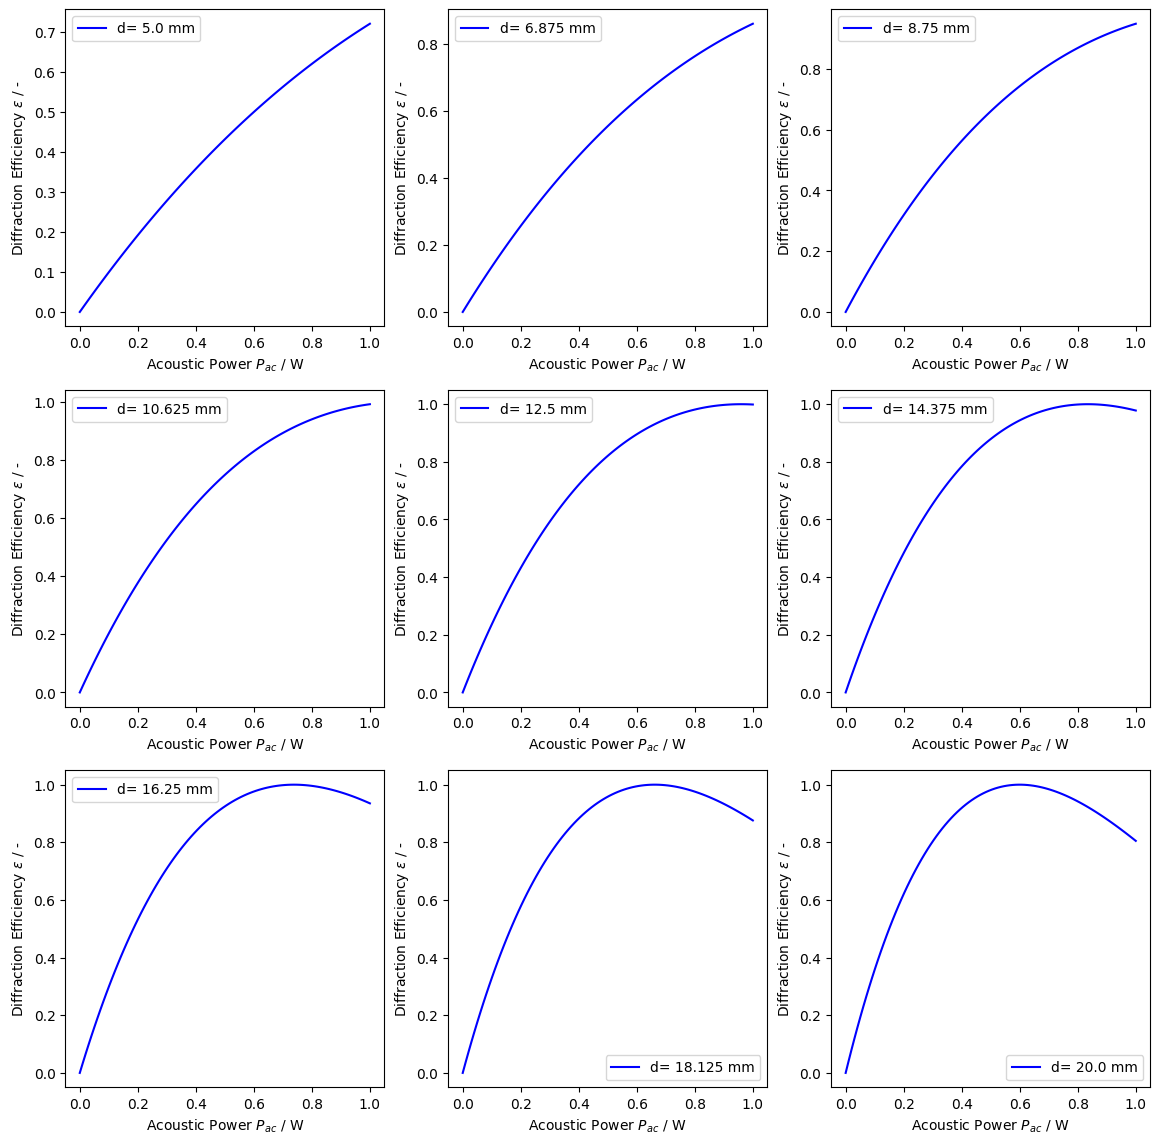

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#defining constants
lambda_0=633e-9 #633nm in m
M_SiO2 = 1.19*1e-15 #1.67*1e-14 #m^2/W
h=3e-3 #2mm height
d=np.linspace(5, 20, 9)*1e-3 #from 1 to 8 mm interaction length
k=1#.12 #typical transducer conversion loss
P_s1=k*lambda_0**2*h/2/M_SiO2
P_ac=np.linspace(0, 1, 100) #from 0 to 1 Watt

qbeta=2*np.pi*lambda_0**2*d[3]**2*(80e6)**3/1.9**2/1e6/(3.1e3)**3

def eff_precise(d, P):
    P_saturation = P_s1/d
    return (np.sin(np.pi / 2 * (P/P_saturation)**0.5))**2

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(P_ac, eff_precise(d[i*3+j], P_ac), color="blue", label=("d= " + str(1000*d[i*3+j]) + " mm"))
        ax[i][j].set_xlabel(r"Acoustic Power $P_{ac}$ / W")
        ax[i][j].set_ylabel(r"Diffraction Efficiency $\varepsilon$ / -")
        ax[i][j].legend()
plt.savefig("diff_eff_diff_int_length.png", dpi=300)
plt.show()
#plt.plot(P_ac, eff_precise(d[3], P_ac))

## Diffraction Efficiency vs. Acoustic Power - Approximation for small Bragg angle

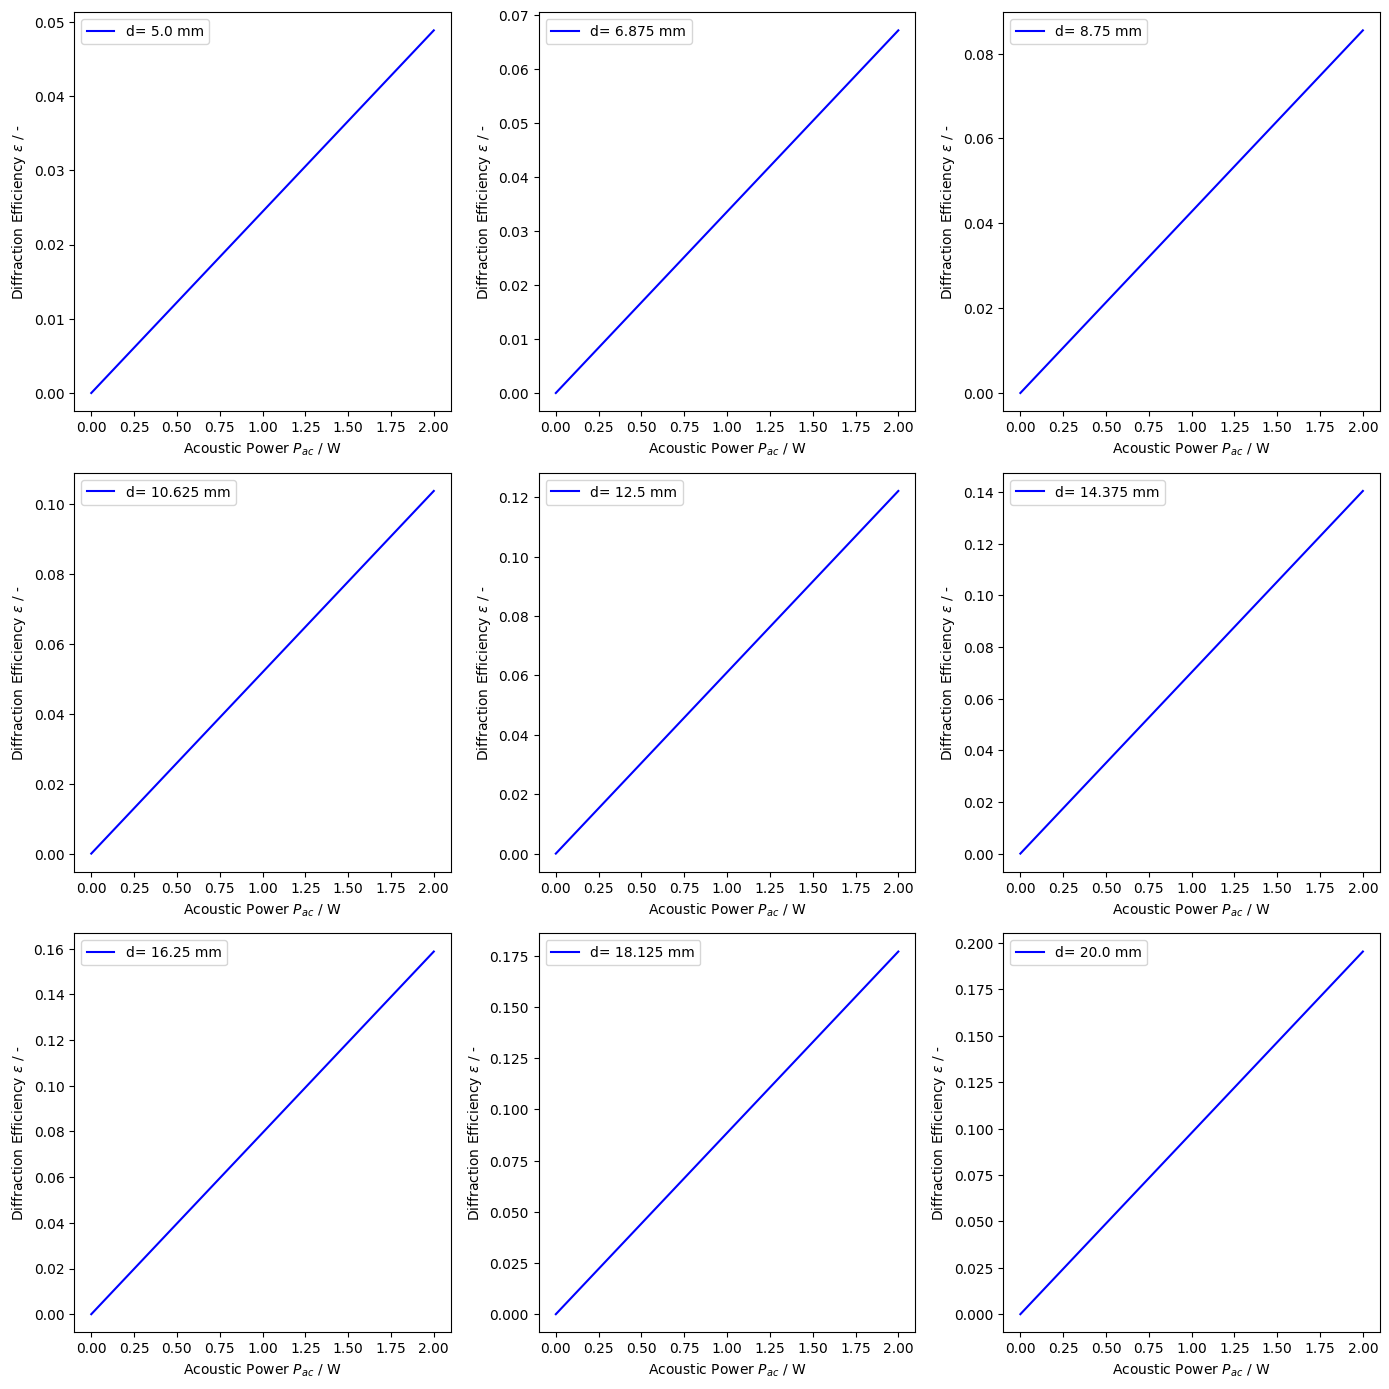

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#defining constants
lambda_0=633e-9 #633nm in m
M_SiO2 = 1.19*1e-15 #m^2/W
h=3e-3 #2mm height
d=np.linspace(5, 20, 9)*1e-3 #from 1 to 8 mm interaction length

P_ac=np.linspace(0, 2, 100) #from 0 to 1 Watt


#Approximation for small diffraction angles
def eff_calculate(d, P_ac):
    I=P_ac/h/d
    return (np.pi**2 * M_SiO2 / 2 / lambda_0**2 * I * d**2)

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(P_ac, eff_calculate(d[i*3+j], P_ac), color="blue", label=("d= " + str(1000*d[i*3+j]) + " mm"))
        ax[i][j].set_xlabel(r"Acoustic Power $P_{ac}$ / W")
        ax[i][j].set_ylabel(r"Diffraction Efficiency $\varepsilon$ / -")
        ax[i][j].legend()
plt.tight_layout()
plt.savefig("diff_eff_diff_int_length.png", dpi=300)
plt.show()

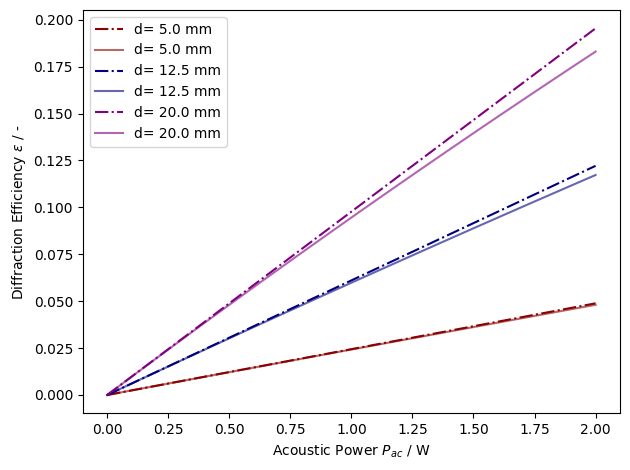

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#defining constants
lambda_0=633e-9 #633nm in m
M_SiO2 = 1.19*1e-15 #m^2/W
h=3e-3 #2mm height
d=np.linspace(5, 20, 3)*1e-3 #from 1 to 8 mm interaction length

P_ac=np.linspace(0, 2, 100) #from 0 to 1 Watt


#Approximation for small diffraction angles
def eff_calculate(d, P_ac):
    I=P_ac/h/d
    return (np.pi**2 * M_SiO2 / 2 / lambda_0**2 * I * d**2)

def eff_precise_calc(d, P_ac):
    I=P_ac/h/d
    return (np.sin(np.pi * d / lambda_0 * np.sqrt(0.5 * M_SiO2 * I)))**2

colors = ["darkred", "navy", "purple"]
for i in range(len(d)): 
    l1,=plt.plot(P_ac, eff_calculate(d[i], P_ac), label=("d= " + str(1000*d[i]) + " mm"), ls="-.", color=colors[i])
    l2,=plt.plot(P_ac, eff_precise_calc(d[i], P_ac), label=("d= " + str(1000*d[i]) + " mm"), color=colors[i], alpha = 0.6)
    plt.xlabel(r"Acoustic Power $P_{ac}$ / W")
    plt.ylabel(r"Diffraction Efficiency $\varepsilon$ / -")

plt.legend()
plt.tight_layout()
plt.savefig("diff_eff_diff_int_length.png", dpi=300)
plt.show()

## Bragg Angle Calculation

$\theta_B = \sin^{-1}{(\frac{\lambda}{2\Lambda})} \approx (\frac{\lambda}{2\Lambda})$

$\Omega/2\pi = \nu_s = v_s/\Lambda$

From https://www.rp-photonics.com/acousto_optic_modulators.html:

$v_{s, SiO2} = 5970$ and 
$v_{s, TeO2} = 4200$ #m/s

The piezo transducer excites a sound wave with a frequency of the order of 100 MHz and with an acoustic wavelength which is typically between 10 μm and 100 μm and an acoustic power e.g. of the order of 1 W to 10 W.

In [13]:
#function for getting wavelength differences using finite differences
import numpy as np
lambda_light = np.linspace(3, 16, 40)*1e-9 #m
v_s = np.array([5970, 4200]) #m/s
nu_acoustic = 100*1e6 #MHz
def angle_diff(n):
    lambda_acoustic = np.array(v_s[n]/nu_acoustic)
    bragg = np.arcsin(lambda_light/2/lambda_acoustic)
    return bragg

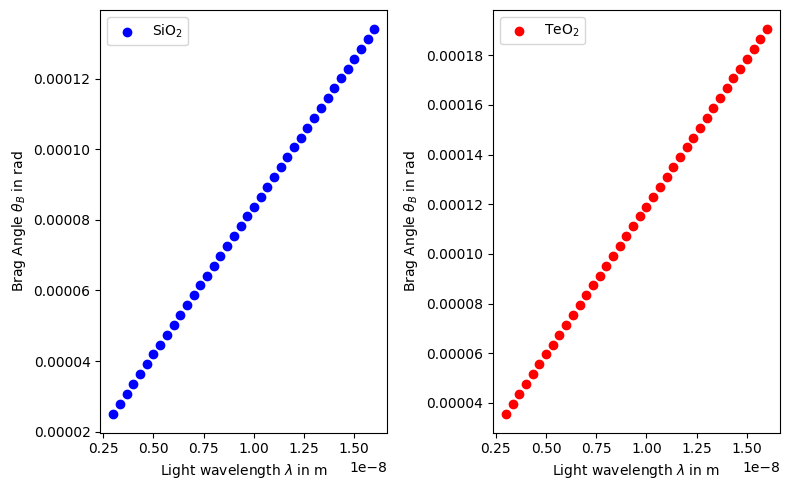

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#SiO2 graphs
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

angle_delta = angle_diff(0)
ax[0].scatter(lambda_light, angle_delta, color="blue", label = r"SiO$_2$")
ax[0].set_xlabel(r"Light wavelength $\lambda$ in m")
ax[0].set_ylabel(r"Brag Angle $\theta_B$ in rad")
ax[0].legend()

ax[1].scatter(lambda_light, angle_diff(1), color="red", label = r"TeO$_2$")
ax[1].set_xlabel(r"Light wavelength $\lambda$ in m")
ax[1].set_ylabel(r"Brag Angle $\theta_B$ in rad")
ax[1].legend()

plt.tight_layout()
plt.savefig("Bragg_differences.png", dpi=300)
plt.show()

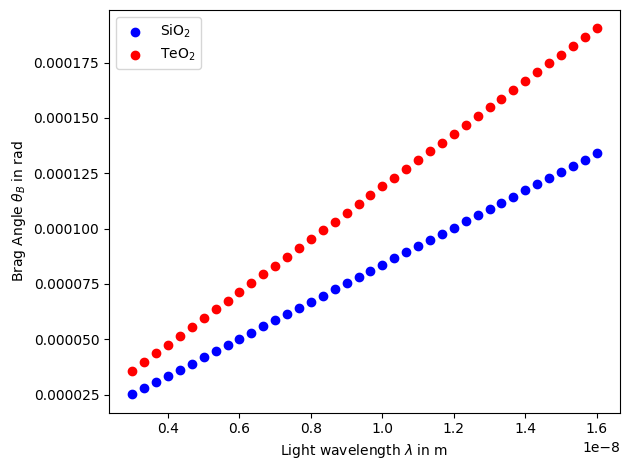

In [16]:
plt.scatter(lambda_light, angle_delta, color="blue", label = r"SiO$_2$")
plt.scatter(lambda_light, angle_diff(1), color="red", label = r"TeO$_2$")
plt.xlabel(r"Light wavelength $\lambda$ in m")
plt.ylabel(r"Brag Angle $\theta_B$ in rad")
plt.legend()


plt.tight_layout()
plt.savefig("Bragg_differences1.png", dpi=300)
plt.show()

In [8]:
print(angle_diff(0).min())

1.495726496222432e-06


## Propagation of an acoustic wave across the focus of an optical wave

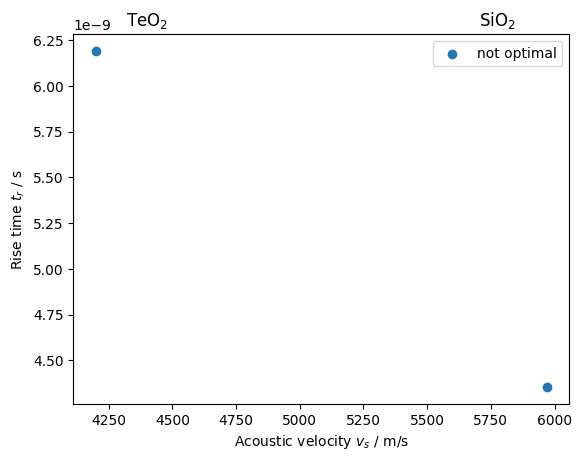

In [17]:
waist1=20*1e-6 #10um
v_sio2=5.970e3 #m/s
v_teo2=4.2e3 #m/s
import matplotlib.pyplot as plt
#inputs: w waist and v valocity of sound in a material
#outputs: not optimal tr_not_opt and optimal rise time tr_opt
def rise_time(w, v):
    return (1.3*w/v, 1.7*w/v)

#plot for two materials with same beam waist, rise time (y) for sound velocity (x)
plt.scatter([v_sio2, v_teo2], [rise_time(waist1, v_sio2)[0], rise_time(waist1, v_teo2)[0]], label="not optimal")
#plt.scatter([v_sio2, v_teo2], [rise_time(waist1, v_sio2)[1], rise_time(waist1, v_teo2)[1]], label="optimal")
plt.title(r"TeO$_2$                                                           SiO$_2$")
plt.xlabel("Acoustic velocity $v_s$ / m/s")
plt.ylabel("Rise time $t_r$ / s")
#plt.xlim(3800, 6400)
plt.legend()
plt.savefig("te_si_tr.png", dpi=300)
plt.show()

In [18]:
print(rise_time(waist1, v_sio2)[0], rise_time(waist1, v_teo2)[0])

4.355108877721943e-09 6.19047619047619e-09


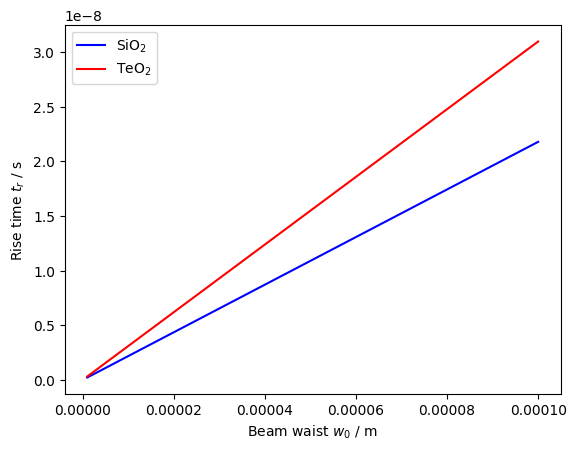

In [20]:
#plot for two materials with same beam waist
import numpy as np
import matplotlib.pyplot as plt
waists=np.linspace(1, 100, 100)*1e-6 #waists from 1 to 100 micrometers
#switching speeds in 1/T in Hz
plt.plot(waists, rise_time(waists, v_sio2)[0], label=r"SiO$_2$", color="blue")
#plt.plot(waists, rise_time(waists, v_sio2)[1], label=r"SiO$_2$ optimal")
plt.plot(waists, rise_time(waists, v_teo2)[0], label=r"TeO$_2$", color="red")
#plt.plot(waists, rise_time(waists, v_teo2)[1], label=r"TeO$_2$ optimal")
plt.xlabel("Beam waist $w_0$ / m")
plt.ylabel("Rise time $t_r$ / s")
plt.legend()
plt.savefig("different_waists_te_si.png", dpi=300)
plt.show()

[ 0.06366198  7.13014145 14.19662092 21.2631004  28.32957987 35.39605934
 42.46253882 49.52901829 56.59549776 63.66197724]


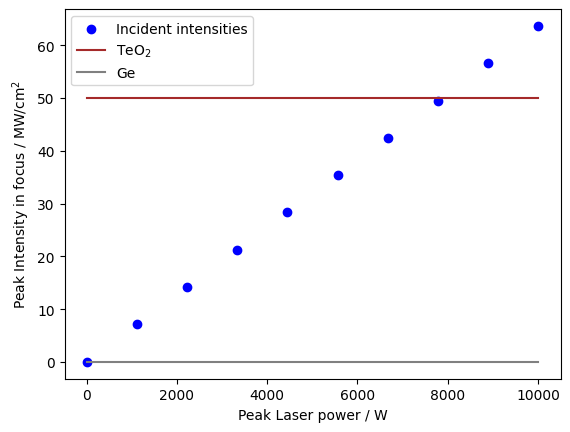

In [24]:
import numpy as np
import matplotlib.pyplot as plt
powers=np.linspace(10, 10000, 10) #W of each pulse
w_0=100*1e-6 #100um
Intensity=2*powers/np.pi/w_0**2/1e6/1e4 #MW/cm^2
print(Intensity)
plt.scatter(powers, Intensity, color="blue", label="Incident intensities")
#plt.plot(powers, np.ones(10)*500, color="gray", label=r"SiO$_2$")
plt.plot(powers, np.ones(10)*50, color="brown", label=r"TeO$_2$")
plt.plot(powers, np.ones(10)*0.015, color="gray", label=r"Ge")
plt.xlabel(r"Peak Laser power / W")
plt.ylabel(r"Peak Intensity in focus / MW/cm$^2$")
plt.legend()
plt.savefig("Max_intenisty.png", dpi=300)
plt.show()